# Multi-Control-X

The multi-control-X applies X gate to one target qubit bit only if the logical AND of all control qubits is satisfied.
The multi-control-X function incorporates numerous implementations for the multi-control-X gate,
each with a different depth and number of auxiliary qubits.
These implementations generically outperform the Gray-code, V-chain and recursive implementations of Ref. [[1]](#1),
as well as the relative-phase Toffoli implementation of Ref. [[2]](#2).
Given a sufficient number of auxiliary qubits, some implementations allow for logarithmic depth and linear CX-count.
The synthesis process selects the appropriate implementation depending on the defined constraints.

Operator: `control`

Arguments:

- `ctrl: Union[QBit, QArray[QBit]]`
- `stmt_block: QCallable`
  

Operator `control` takes a qubit array of length one or more as `ctrl`, and applies the `stmt_block` operand if all qubits are in the `1` state 


# Part 1

Synthesize 3 different implementations of an MCX (multi-control-x) with 5 `control` qubits and 1 target qubit. 

One implementation should be optimized for minimized depth, the other for minimized width, and the third
somewhere in between

In [44]:
from classiq import *


@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(5, cntrl)
    allocate(1, target)
    hadamard_transform(cntrl)
    control(ctrl=cntrl, stmt_block=lambda: X(target))

### Minimized Depth

In [49]:
qmod = create_model(main)

qmod_min_depth = set_constraints(
    qmod, Constraints(optimization_parameter="depth")
)

qprog_min_depth = synthesize(qmod_min_depth)
show(qprog_min_depth)

Opening: https://platform.classiq.io/circuit/64355333-65ac-4cd0-a2ee-33aed135c39f?version=0.62.0


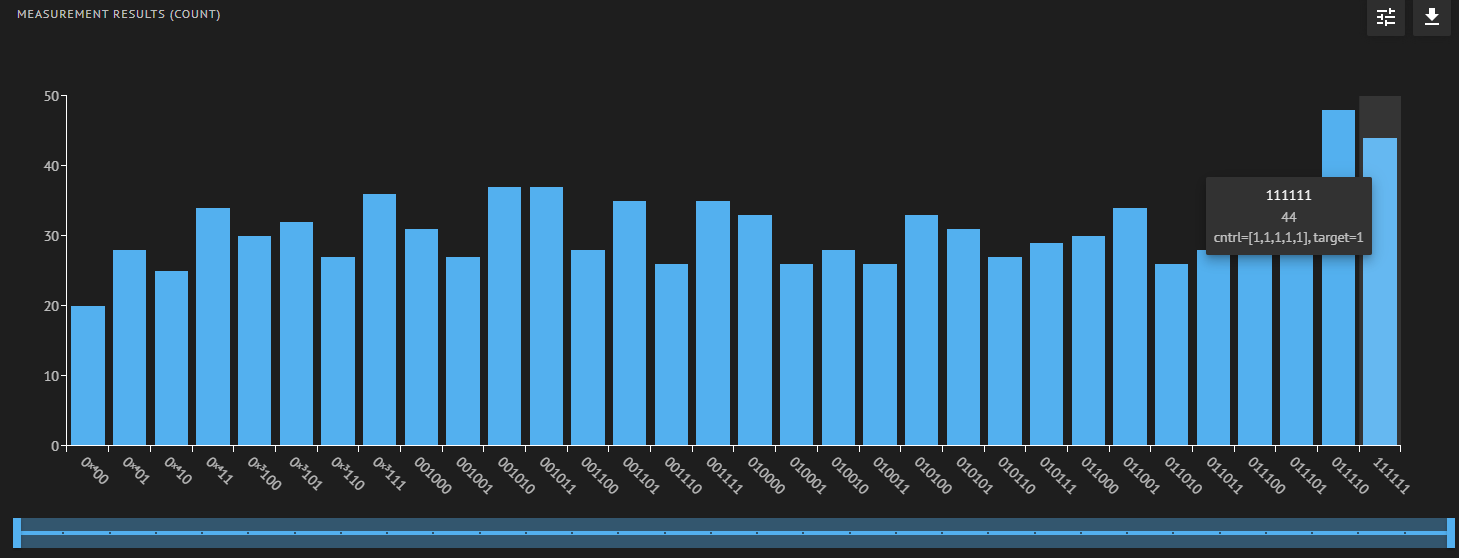

#### Print max depth

In [37]:
circuit_depth = QuantumProgram.from_qprog(qprog_min_depth).transpiled_circuit.depth
print(f"The max circuit depth is {circuit_depth}")

The max circuit depth is 34


### Minimized Width

In [46]:
qmod = create_model(main)

qmod_min_width = set_constraints(
    qmod, Constraints(optimization_parameter="width")
)

qprog_min_width = synthesize(qmod_min_width)
show(qprog_min_width)

Opening: https://platform.classiq.io/circuit/a3d4708f-efa7-4f75-ab5f-919582bf6222?version=0.62.0


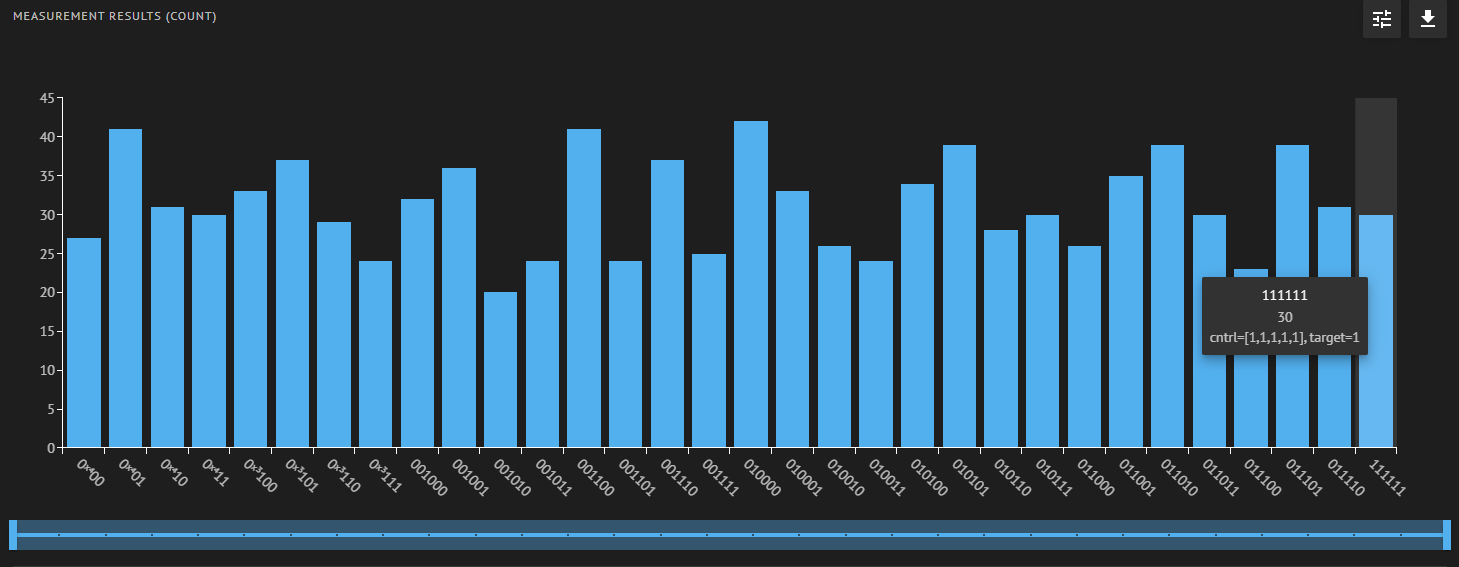

#### Print max width

In [41]:
circuit_width = QuantumProgram.from_qprog(qprog_min_width).data.width
print(f"The max circuit width is {circuit_width}")

The max circuit width is 6


### Somewhere in between

Previously we saw that the max depth is 34 and the max width is 6, so we will choose:

depth - 50

width - 10

In [48]:
qmod = create_model(main)

qmod_between = set_constraints(
    qmod, Constraints(max_width=10, max_depth=50)
)

qprog_between = synthesize(qmod_between)
show(qprog_between)


Opening: https://platform.classiq.io/circuit/c2686169-b4d5-43f2-a3ad-c8e8cef87a1c?version=0.62.0


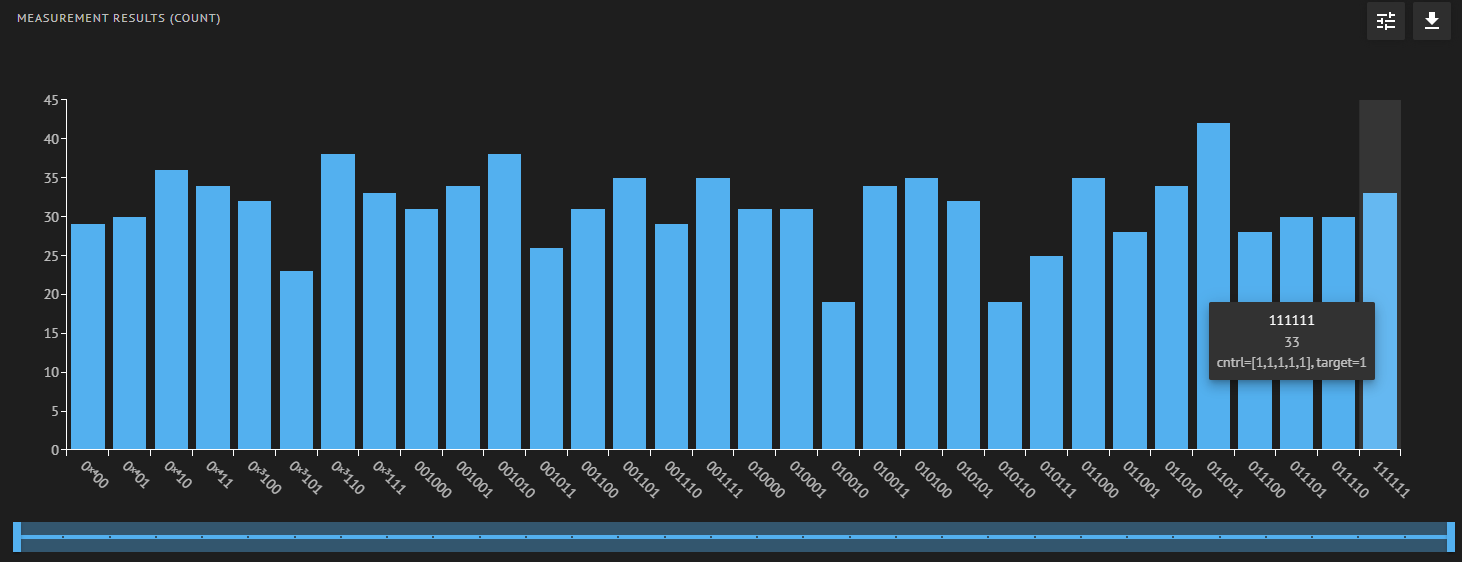

In [43]:
circuit_width = QuantumProgram.from_qprog(qprog_between).data.width
circuit_depth = QuantumProgram.from_qprog(qprog_between).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit depth is {circuit_depth}")

The circuit width is 8 and the circuit depth is 34


# Part 2

Synthesize 2 different implementations of an MCX with 20 control qubits and 1 target qubit. Compare the circuit width and circuit depth required for each
implementation. 

In [1]:
from classiq import *


@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(20, cntrl)
    allocate(1, target)
    hadamard_transform(cntrl)
    control(ctrl=cntrl, stmt_block=lambda: X(target))

### Minimized Depth

In [3]:
qmod = create_model(main)

qmod_min_depth = set_constraints(
    qmod, Constraints(optimization_parameter="depth")
)

qprog_min_depth = synthesize(qmod_min_depth)
show(qprog_min_depth)

Opening: https://platform.classiq.io/circuit/2dc06f6a-f495-4fb6-af3a-004762c0b09f?version=0.62.0


#### Print max depth

In [9]:
circuit_depth = QuantumProgram.from_qprog(qprog_min_depth).transpiled_circuit.depth
print(f"The max circuit depth is {circuit_depth}")
circuit_width = QuantumProgram.from_qprog(qprog_min_depth).data.width
print(f"The max circuit width is {circuit_width}")

The max circuit depth is 66
The max circuit width is 30


### Minimized Width

In [20]:
qmod = create_model(main)

qmod_min_width = set_constraints(
    qmod, Constraints(optimization_parameter="width")
)

qprog_min_width = synthesize(qmod_min_width)
show(qprog_min_width)

Opening: https://platform.classiq.io/circuit/4cdac3b1-c8ec-4152-abb5-337446ed8e30?version=0.62.0


#### Print max width

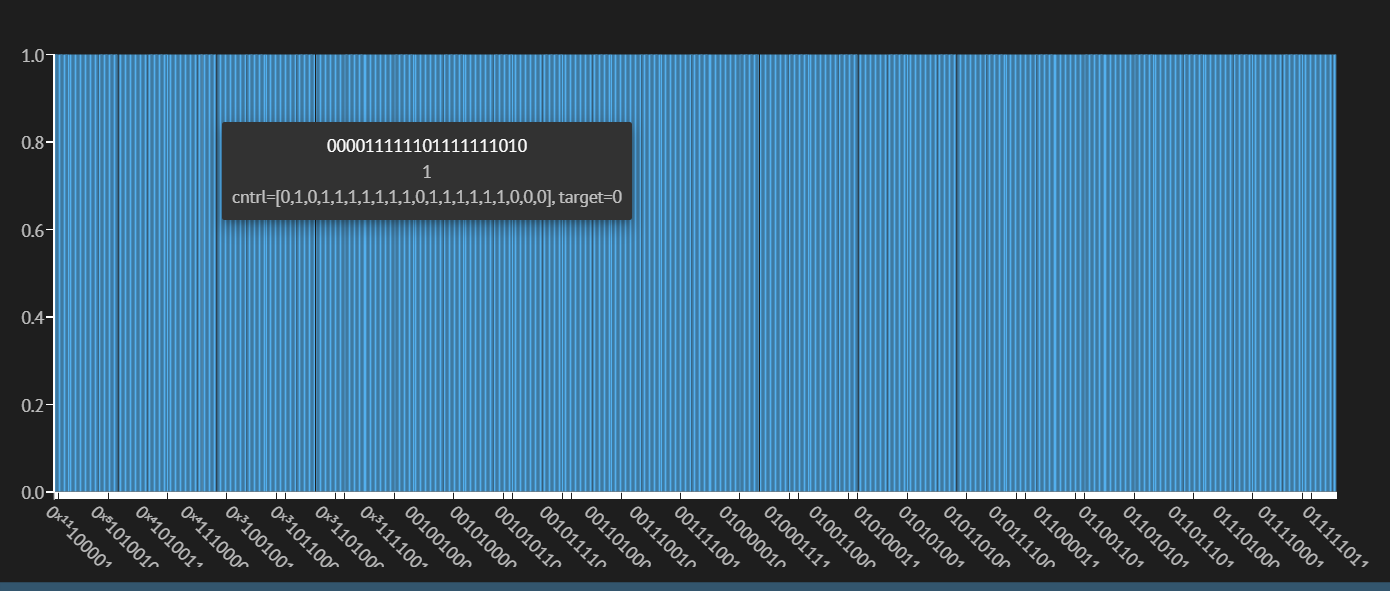

In [19]:
circuit_depth = QuantumProgram.from_qprog(qprog_min_width).transpiled_circuit.depth
print(f"The max circuit depth is {circuit_depth}")
circuit_width = QuantumProgram.from_qprog(qprog_min_width).data.width
print(f"The max circuit width is {circuit_width}")

The max circuit depth is 1894
The max circuit width is 22


# Part 3

Synthesize 9 different implementations of an MCX with 20 control qubits and 1 target qubit, while varying the max number of qubits within the “max width”
constraint - from 22 to 30. 

For each implementation, optimize for minimal depth. Plot a graph of the transpiled circuit depth as a function of the number of
qubits used (i.e. the circuit width) in each implementation. 

In [ ]:
from classiq import *


@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(20, cntrl)
    allocate(1, target)
    hadamard_transform(cntrl)
    control(ctrl=cntrl, stmt_block=lambda: X(target))

### Minimized Depth

width: 22 depth: 1894
width: 23 depth: 1427
width: 24 depth: 1079
width: 25 depth: 893
width: 26 depth: 471
width: 27 depth: 315
width: 28 depth: 191
width: 29 depth: 104
width: 30 depth: 66


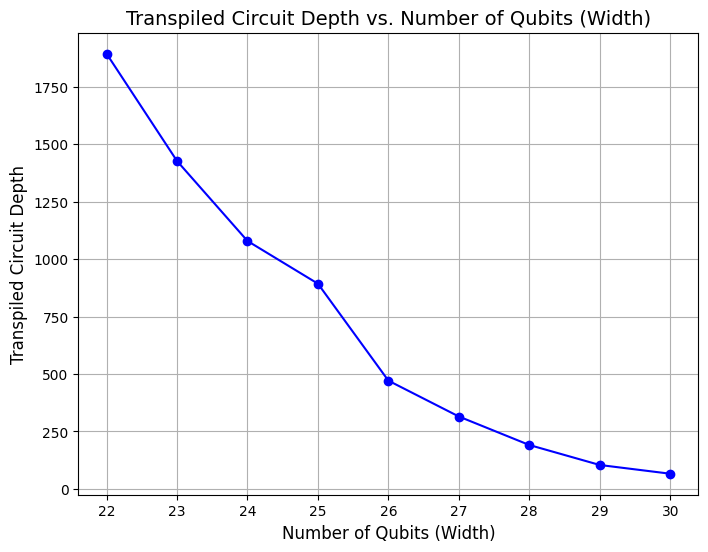

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

widths = []
depths = []

# Loop over max_width from 22 to 30
for max_width in range(22, 31):
    qmod = create_model(main)

    qmod_with_constraint = set_constraints( 
        qmod, Constraints(optimization_parameter="depth", max_width=max_width)
    )

    qprog = synthesize(qmod_with_constraint)

    circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
    print(f"width: {max_width} depth: {circuit_depth}")
    
    # Get the transpiled circuit depth
    depths.append(circuit_depth)
    widths.append(max_width)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(widths, depths, marker='o', linestyle='-', color='b')
plt.title("Transpiled Circuit Depth vs. Number of Qubits (Width)", fontsize=14)
plt.xlabel("Number of Qubits (Width)", fontsize=12)
plt.ylabel("Transpiled Circuit Depth", fontsize=12)
plt.grid(True)
plt.show()


#### Print max depth

In [ ]:
circuit_depth = QuantumProgram.from_qprog(qprog_min_depth).transpiled_circuit.depth
print(f"The max circuit depth is {circuit_depth}")

The max circuit depth is 34
